# Agriculture data classification problem

# 1. problem statement
> We have the dataset of agriculture we should determine the outcome of season harvest i.e whether the crop is healthy (Alive), damaged by pesticides or damaged by other reasons



# 2. Data
*We have two set of datasets*

> * 1.Training dataset : https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/train_agriculture.xlsx
> * 2.Test dataset : https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/test_agriculture.xlsx


# 3.Evaluation
> If we can achieve our model accuracy above `80` we will continue with this project



# 4.Features
***The field descriptions are***
* 1.ID : Unique ID
* 2.Estimated_Insects_Count : Estimated insects count per square meter
* 3.Crop_Type : category of crop(0,1)
* 4.Soil_Type : Category of soil(0,1)
* 5.Pesticide_Use_Category : type of pesticide uses(1  = Never, 2 = previously used, 3 = currently using)
* 6.Number_Doses_Week : Number of doses per week
* 7.Number_Weeks_Used : Number of weeks used
* 8.Number_Weeks_Quit : Number of weeks quit
* 9.Season : Season category(0,1,2)
* 10.Crop_Damage:Crop damage category(0 = Alive, 1 = damage due to other causes, 2 = damage due to pesticides)


> * `Crop damage` dependent variable(target variable).
> * All the other variables are independent.

# Getting tools ready

In [1]:
#lets import visualization libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
%matplotlib inline

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE

#importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

#importing the metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, classification_report, confusion_matrix

#filter warnings
import warnings
warnings.filterwarnings('ignore')

# Reading data

In [2]:
df = pd.read_excel('train_agriculture.xlsx')
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


# Exploratory data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [4]:
df.isna().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

* we got missing values in `Number_Weeks_used` feature

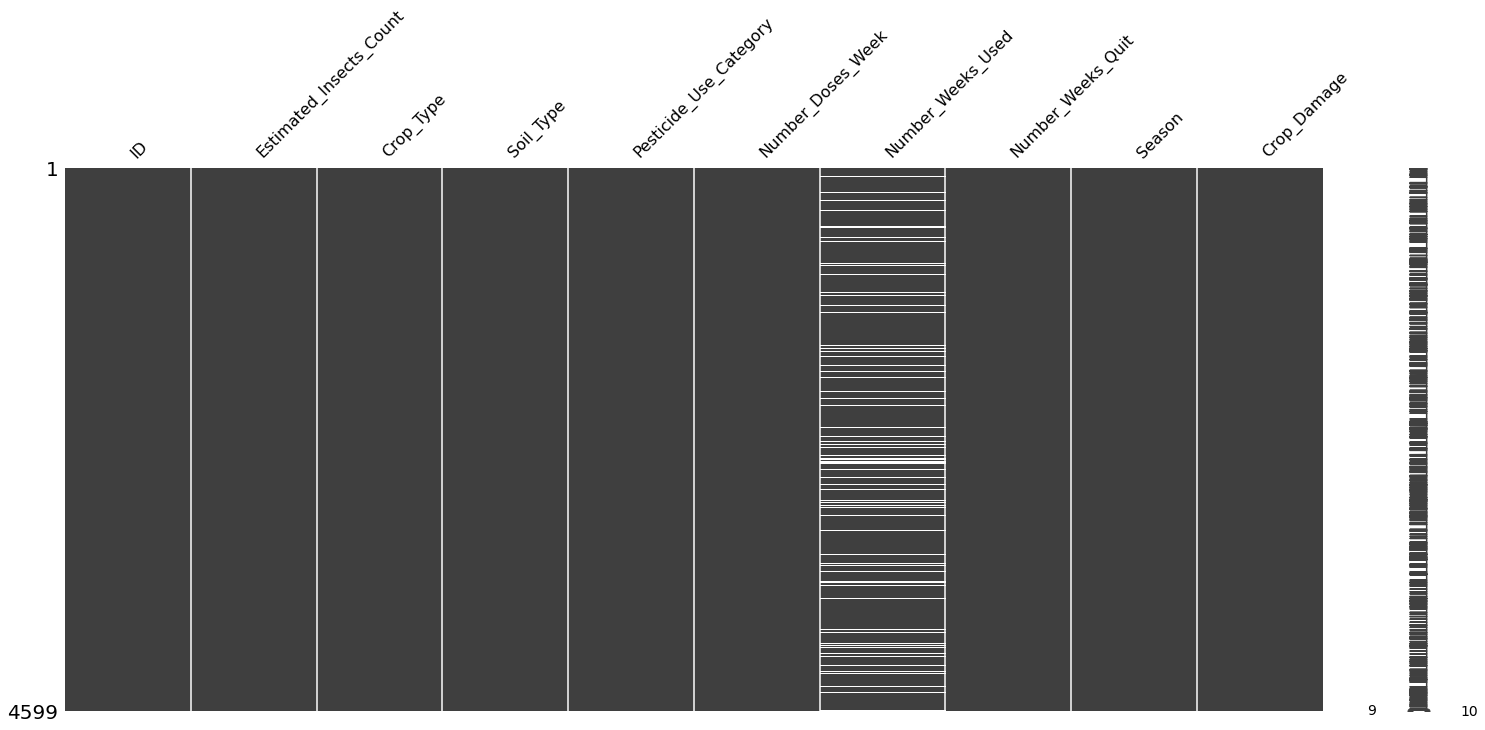

In [5]:
missingno.matrix(df);

In [6]:
df.nunique()

ID                         4599
Estimated_Insects_Count      71
Crop_Type                     2
Soil_Type                     2
Pesticide_Use_Category        3
Number_Doses_Week            20
Number_Weeks_Used            63
Number_Weeks_Quit            47
Season                        3
Crop_Damage                   3
dtype: int64

In [7]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64


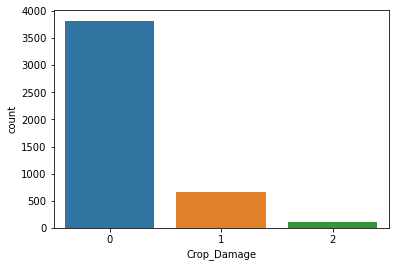

In [8]:
print(df['Crop_Damage'].value_counts())
sns.countplot(df['Crop_Damage']);

* `0` category is more in dataset when comparing to other categories

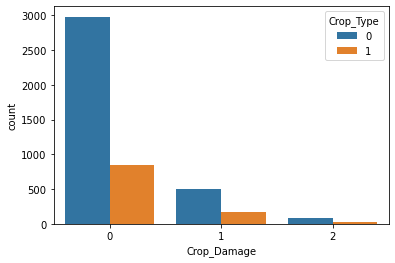

In [9]:
sns.countplot(df['Crop_Damage'], hue = df['Crop_Type']);

* crop type `0` is more `alive` in condition when comparing to other crops

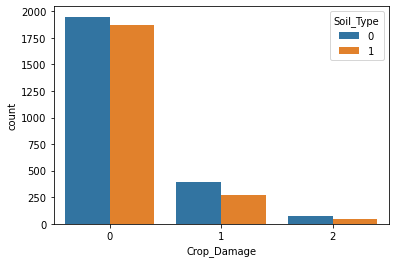

In [10]:
sns.countplot(df['Crop_Damage'], hue = df['Soil_Type']);

* The crops which have soil type `0` is more alive in condition when compare to other crops

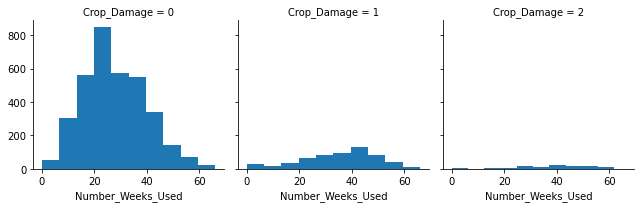

In [11]:
N = sns.FacetGrid(df, col = 'Crop_Damage')
N.map(plt.hist, 'Number_Weeks_Used');

* Crops which have number of weeks used in `20` to `30` are alive when comparing with other two cases

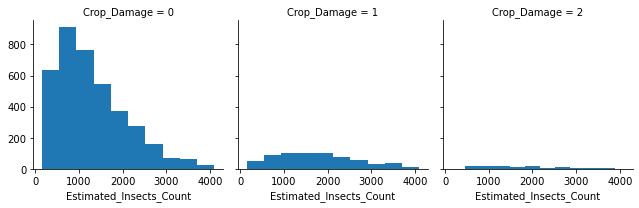

In [12]:
E = sns.FacetGrid(df, col = 'Crop_Damage')
E.map(plt.hist,'Estimated_Insects_Count');

* Crops which are alive(0) has more number of insects

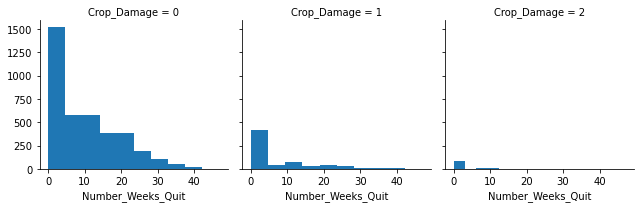

In [13]:
NW = sns.FacetGrid(df, col = 'Crop_Damage')
NW.map(plt.hist, 'Number_Weeks_Quit');

* Crops having number of weeks less than `10` are more likely to be alive

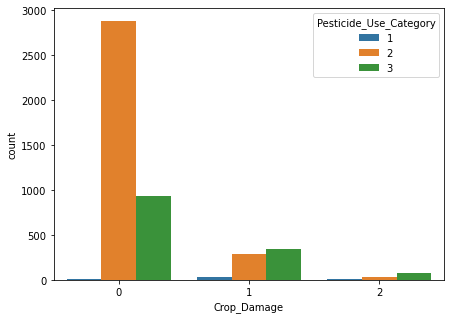

In [14]:
plt.figure(figsize = (7,5))
sns.countplot(df['Crop_Damage'], hue = df['Pesticide_Use_Category']);

* Pesticide_use_category with `0` has more crops in alive condition when comparing to other pesticides

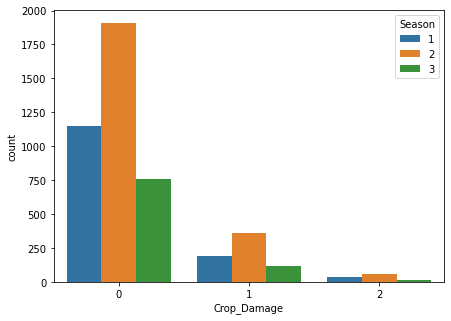

In [15]:
plt.figure(figsize = (7,5))
sns.countplot(df['Crop_Damage'], hue = df['Season']);

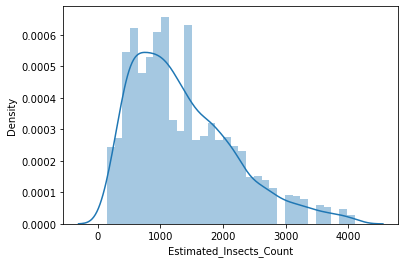

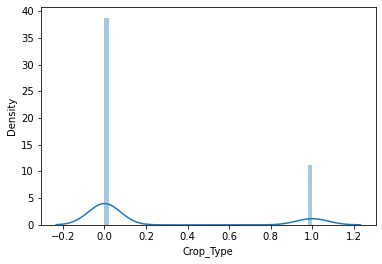

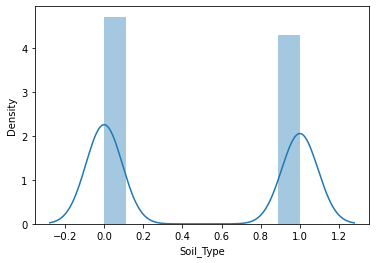

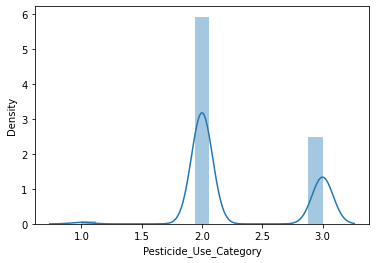

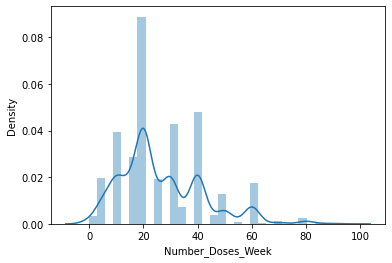

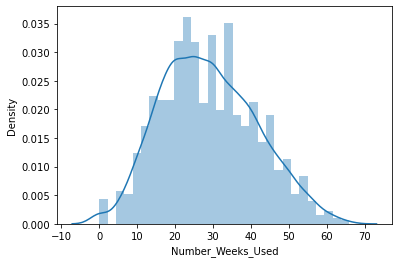

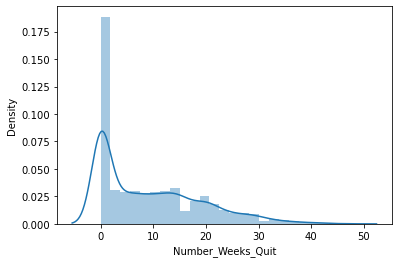

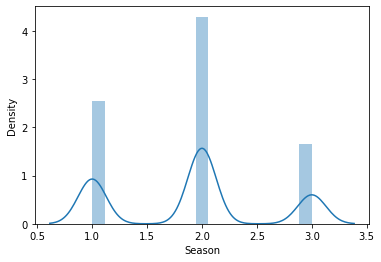

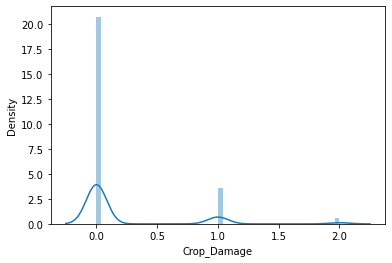

In [16]:
for cols in df.columns:
    if pd.api.types.is_numeric_dtype(df[cols]):
        sns.distplot(df[cols])
        plt.show()

## Filling the missing values with the median

In [17]:
df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].median(),inplace = True)
df.isna().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

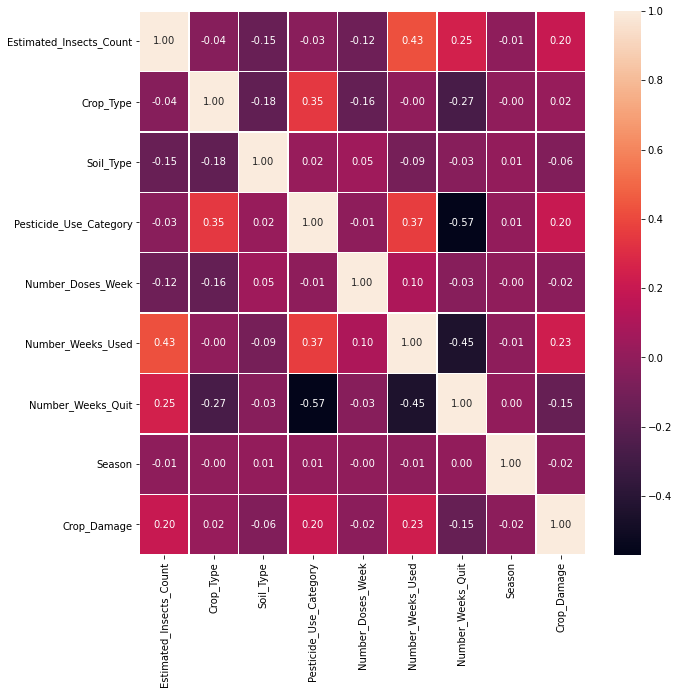

In [18]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),
           annot = True,
           fmt = '.2f',
           linewidth = .5);

In [19]:
# Since the feature unique ID has no pattern in it lets drop that
df.drop('ID', axis = 1, inplace = True)

> If we try to treat outliers here we are losing our target variable `2` so here continuing with the same dataset

In [20]:
X = df.drop('Crop_Damage', axis = 1)
y = df['Crop_Damage']

In [21]:
X.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.299898
Number_Weeks_Quit          0.919771
Season                     0.144841
dtype: float64

In [22]:
for cols in X.columns:
    if X.skew().loc[cols]> 0.7:
        X[cols] = np.log1p(X[cols])

In [23]:
X.skew()

Estimated_Insects_Count   -0.498606
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week         -1.196764
Number_Weeks_Used          0.299898
Number_Weeks_Quit         -0.199671
Season                     0.144841
dtype: float64

> Here we can see that there are no strong skewness in this though `crop_type` having some skewness since it has only 2 values we are not going to treat them

## Building Model

In [24]:
#scaling the dataset
sd = StandardScaler()
X_new = sd.fit_transform(X)



#splitting the data into train and valid
X_train, X_valid, y_train, y_valid = train_test_split(X_new,
                                                     y,
                                                     test_size = 0.2)

In [25]:
models = [LogisticRegression(), DecisionTreeClassifier(),KNeighborsClassifier(), SVC(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(),XGBClassifier(),BaggingClassifier()]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    print(model)
    print(accuracy_score(y_valid, y_pred))
    print(classification_report(y_valid, y_pred))
    print(confusion_matrix(y_valid, y_pred))
    print('\n')

LogisticRegression()
0.8271739130434783
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       765
           1       0.33      0.05      0.09       134
           2       0.00      0.00      0.00        21

    accuracy                           0.83       920
   macro avg       0.39      0.35      0.33       920
weighted avg       0.75      0.83      0.77       920

[[754  11   0]
 [127   7   0]
 [ 18   3   0]]


DecisionTreeClassifier()
0.7456521739130435
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       765
           1       0.27      0.32      0.30       134
           2       0.04      0.05      0.05        21

    accuracy                           0.75       920
   macro avg       0.39      0.40      0.40       920
weighted avg       0.76      0.75      0.75       920

[[642 110  13]
 [ 82  43   9]
 [ 16   4   1]]


KNeighborsClassifier()
0.8119565217391305
              pr

> As our models are struggling in predicting because of the imbalanced state lets `OverSample` our data using `SMOTE`

In [26]:
sm = SMOTE()
X_new2, y2 = sm.fit_resample(X_new,y)

X_train_sm, X_valid_sm, y_train_sm, y_valid_sm = train_test_split(X_new2,
                                                     y2,
                                                     test_size = 0.2)

In [28]:
models = [LogisticRegression(), DecisionTreeClassifier(),KNeighborsClassifier(), SVC(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(),XGBClassifier(),BaggingClassifier()]
for model in models:
    model.fit(X_train_sm, y_train_sm)
    y_pred_smn = model.predict(X_valid_sm)
    print(model)
    print(accuracy_score(y_valid_sm, y_pred_smn))
    print(classification_report(y_valid_sm, y_pred_smn))
    print(confusion_matrix(y_valid_sm, y_pred_smn))
    print('\n')

LogisticRegression()
0.49781849912739967
              precision    recall  f1-score   support

           0       0.57      0.67      0.61       768
           1       0.43      0.25      0.31       791
           2       0.46      0.59      0.52       733

    accuracy                           0.50      2292
   macro avg       0.49      0.50      0.48      2292
weighted avg       0.49      0.50      0.48      2292

[[514 103 151]
 [242 194 355]
 [151 149 433]]


DecisionTreeClassifier()
0.8023560209424084
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       768
           1       0.76      0.72      0.74       791
           2       0.87      0.92      0.90       733

    accuracy                           0.80      2292
   macro avg       0.80      0.81      0.80      2292
weighted avg       0.80      0.80      0.80      2292

[[593 146  29]
 [153 568  70]
 [ 17  38 678]]


KNeighborsClassifier()
0.8394415357766143
              p

***From this experimentation concluding that `XGBClassifier` is performing well***

## Hyper parameter tuning for XGBClassifier

In [42]:
cv = KFold(n_splits = 5)
params = {'loss' : ['hinge', 'log', 'modifier_huber', 'squared_hinge','perception'],
         'penality' : ['li','l2','elasticnet'],
         'alpha' : [0.0001,0.001, 0.01, 1, 10, 100, 1000],
         'n_estimators' : [100,200, 500, 1000]}

Xgb_grid =  GridSearchCV(XGBClassifier(objective = 'multi:softmax', learning_rate = 0.01,max_depth = 3, alpha = 10),
                        param_grid = params,
                        cv = cv,
                        verbose = True,
                        n_jobs = -1)
Xgb_grid.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 30.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 42.3min
[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed: 45.3min finished


[14:16:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { alppha, loss, penality } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:16:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(alppha=10, base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.01, max_delta_step=None,
                                     max_depth=3, min_child_weight=None,
                                     missin...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             n_jobs=

In [46]:
y_pred_xgbc = Xgb_grid.predict(X_valid_sm)
print(confusion_matrix(y_valid_sm, y_pred_xgbc))
print(classification_report(y_valid_sm, y_pred_xgbc))

[[621  93  54]
 [155 440 196]
 [ 21  63 649]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       768
           1       0.74      0.56      0.63       791
           2       0.72      0.89      0.80       733

    accuracy                           0.75      2292
   macro avg       0.75      0.75      0.74      2292
weighted avg       0.75      0.75      0.74      2292



**Choosing the XGBoostClassifier without hyperparamter tuning***

In [49]:
xgb = XGBClassifier()
max_acc_score = 0
for r_state in range(42, 100):
    X_train_xg, X_valid_xg, y_train_xg, y_valid_xg = train_test_split(X_new2,
                                                     y2,
                                                     random_state = r_state,                
                                                     test_size = 0.2)
    xgb.fit(X_train_xg, y_train_xg)
    pred_xgb = xgb.predict(X_valid_xg)
    acc_scr = accuracy_score(y_valid_xg, pred_xgb)
    if acc_scr > max_acc_score:
        max_acc_score = acc_scr
        final_rstate = r_state
print('max acc_score with random state', final_rstate, 'is', max_acc_score)        
        


[15:03:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:03:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:03:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:03:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[15:03:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:03:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:03:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:03:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[15:04:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:04:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:04:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [50]:
xgb = XGBClassifier()
X_train_xg, X_valid_xg, y_train_xg, y_valid_xg = train_test_split(X_new2,
                                                     y2,
                                                     random_state = 46,                
                                                     test_size = 0.2)
xgb.fit(X_train_xg, y_train_xg)

[15:06:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Classification metrics

In [53]:
preds_xgb = xgb.predict(X_valid_xg)
cross_val_score(xgb,X_train_xg,y_train_xg )

[15:10:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

array([0.88549618, 0.88604144, 0.88004362, 0.86743044, 0.87015821])

***We can see that it is not overfitting***

## Scores

In [83]:
print('Accuracy_score :', accuracy_score(y_valid_xg,preds_xgb ))
print('Precision_score :', precision_score(y_valid_xg,preds_xgb , average = 'weighted'))
print('Recall_Score :', recall_score(y_valid_xg,preds_xgb, average = 'weighted'))
print('F1_score :', f1_score(y_valid_xg,preds_xgb, average = 'weighted'))

Accuracy_score : 0.9031413612565445
Precision_score : 0.9028405974325996
Recall_Score : 0.9031413612565445
F1_score : 0.9022387814557121


## Classification report

In [54]:
print(classification_report(y_valid_xg,preds_xgb ))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       802
           1       0.89      0.81      0.85       710
           2       0.93      0.95      0.94       780

    accuracy                           0.90      2292
   macro avg       0.90      0.90      0.90      2292
weighted avg       0.90      0.90      0.90      2292



## Confusion matrix

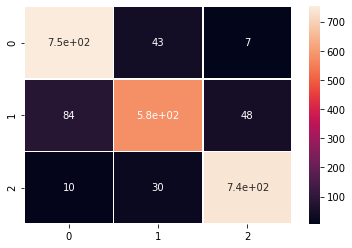

In [57]:
sns.heatmap(confusion_matrix(y_valid_xg, preds_xgb),
           annot = True,
           linewidth = .5);

## Saving Model

In [58]:
import joblib
joblib.dump(xgb, 'Agriculture_crop_classification.pkl')

['Agriculture_crop_classification.pkl']

## Testing on test dataset

In [70]:
df_test = pd.read_excel('test_agriculture.xlsx')
df_test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [71]:
#lets convert the data to the same format of train data
df_test.drop('ID', axis = 1, inplace = True)

In [72]:
df_test.isna().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [73]:
df['Number_Weeks_Used'] = df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].median())

In [74]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  1199 non-null   int64  
 1   Crop_Type                1199 non-null   int64  
 2   Soil_Type                1199 non-null   int64  
 3   Pesticide_Use_Category   1199 non-null   int64  
 4   Number_Doses_Week        1199 non-null   int64  
 5   Number_Weeks_Used        1080 non-null   float64
 6   Number_Weeks_Quit        1199 non-null   int64  
 7   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 75.1 KB


In [78]:
df_test = sd.fit_transform(df_test)

## Saving the predictions

In [84]:
predictions = xgb.predict(df_test)
predictions = pd.DataFrame(predictions, columns = ['Predictions'])
predictions.to_csv('CropDamagePredictions.csv')
predictions

,Predictions
0,1
1,1
2,1
3,1
4,2
...,...
1194,1
1195,2
1196,1
1197,1
